In [1]:
# 1. Import library yang diperlukan
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
import random

Jumlah kelas: 2
Kelas fresh: 59 gambar
Kelas non-fresh: 75 gambar


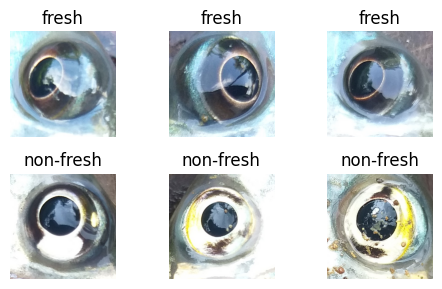

In [2]:
# 2. Menyambung ke dataset, berikan path baru dan tampilkan beberapa contoh gambar dari setiap kelas di dataset dengan rapi dan tampilkan juga jumlah gambar dan kelas dari setiap dataset
dataset_path = "D:/EMON/AMIKOM/PYTHON/dataset/cv/segar&tidak"  # Ganti dengan path ke dataset Anda
classes = os.listdir(dataset_path)
num_classes = len(classes)
print(f"Jumlah kelas: {num_classes}")
for cls in classes:
    num_images = len(os.listdir(os.path.join(dataset_path, cls)))
    print(f"Kelas {cls}: {num_images} gambar")

# Tampilkan beberapa contoh gambar dari setiap kelas
plt.figure(figsize=(5, 3))
for i, cls in enumerate(classes):
    image_files = os.listdir(os.path.join(dataset_path, cls))
    for j in range(3):
        img_path = os.path.join(dataset_path, cls, image_files[j])
        img = plt.imread(img_path)
        plt.subplot(num_classes, 3, i*3 + j + 1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')
plt.tight_layout()
plt.show()

In [3]:
# 3. Fungsi untuk memuat data dan label dari direktori dataset
def load_data(dataset_path):
    data = []
    labels = []
    for class_idx, cls in enumerate(classes):
        class_path = os.path.join(dataset_path, cls)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = plt.imread(img_path)
            img = tf.image.resize(img, (224, 224))  # Sesuaikan dengan input VGG19
            data.append(img)
            labels.append(class_idx)
    return np.array(data), np.array(labels)

data, labels = load_data(dataset_path)

In [4]:
    # 4. Split data menjadi 2 bagian (training dan validation)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

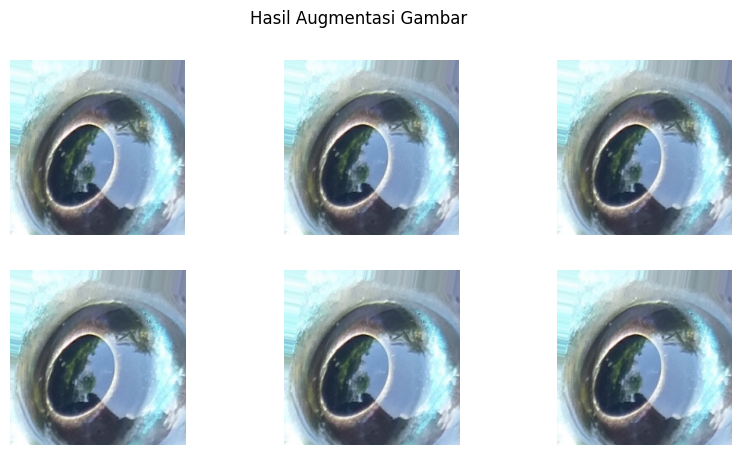

In [5]:
# 5. Augmentasi gambar, dan tampilkan gambar hasil dari augmentasi secara rapi dan berikan keterangan
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Contoh augmentasi gambar
plt.figure(figsize=(10, 5))
for X_batch, _ in datagen.flow(X_train, y_train, batch_size=1):
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(X_batch[0].astype('uint8'))
        plt.axis('off')
    plt.suptitle("Hasil Augmentasi Gambar")
    plt.show()
    break

In [6]:
# 6. Buatkan model VGG19 dan kompail dengan Adam dan tampilkan hasil
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layer VGG19 agar tidak di-train
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Tampilkan ringkasan model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,05

 Total params: 45,717,570 (174.40 MB)

 Trainable params: 25,693,186 (98.01 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [7]:
# 7. Pelatihan model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=20,  # Sesuaikan dengan kebutuhan
    steps_per_epoch=len(X_train) // 32
)

Epoch 1/20


d:\EMON\AMIKOM\PYTHON\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.5651 - loss: 17.7180 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/20
1/3 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step - accuracy: 0.8182 - loss: 29.9370

C:\Users\USER-PC\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 865ms/step - accuracy: 0.8182 - loss: 29.9370 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.8073 - loss: 31.5061 - val_accuracy: 1.0000 - val_loss: 4.4152e-09
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 857ms/step - accuracy: 0.8182 - loss: 38.0523 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.8856 - loss: 10.3571 - val_accuracy: 0.9259 - val_loss: 11.7894
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 991ms/step - accuracy: 0.9375 - loss: 5.3730 - val_accuracy: 0.9630 - val_loss: 1.8036
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.9766 - loss: 2.8354 - val_accuracy: 0.9630 - val_loss: 2.0898
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 984ms/step - accuracy: 0.9091 - loss: 7.1708 - val_accuracy: 0.9630 - val_loss: 1.6586
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.9867 - loss: 0.2631 - val_accuracy: 1.0000 - val_loss: 0.000

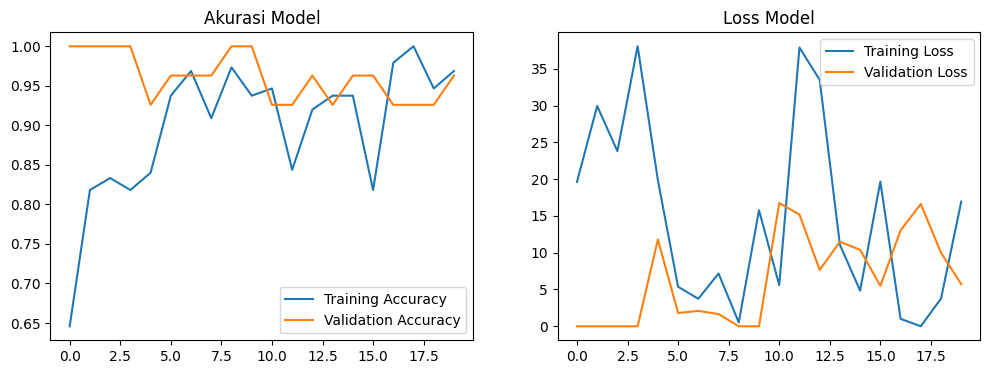

In [8]:
# 8. Tampilkan plot hasil pelatihan
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Akurasi Model')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Model')

plt.show()

In [9]:
# 9. Evaluasi model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Akurasi validasi: {accuracy*100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9630 - loss: 5.7191
Akurasi validasi: 96.30%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


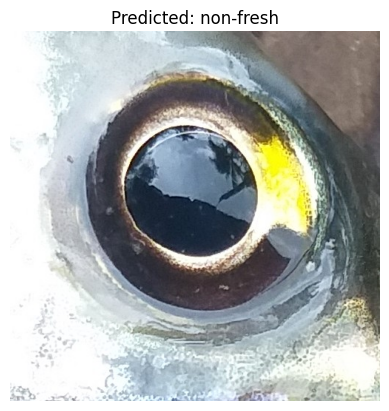

In [10]:
# 10. Prediksi gambar baru
def predict_image(image_path, model):
    img = plt.imread(image_path)
    img_resized = tf.image.resize(img, (224, 224))
    img_resized = np.expand_dims(img_resized, axis=0)
    predictions = model.predict(img_resized)
    predicted_class = classes[np.argmax(predictions)]
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()

# Contoh prediksi gambar baru
new_image_path = 'D:/EMON/AMIKOM/PYTHON/dataset/cv/segar&tidak/non-fresh/tidaksegar(2).jpg'  # Ganti dengan path ke gambar baru
predict_image(new_image_path, model)